In [2]:
import pandas as pd

regress_df_all = pd.read_csv("regressdf_all.csv")

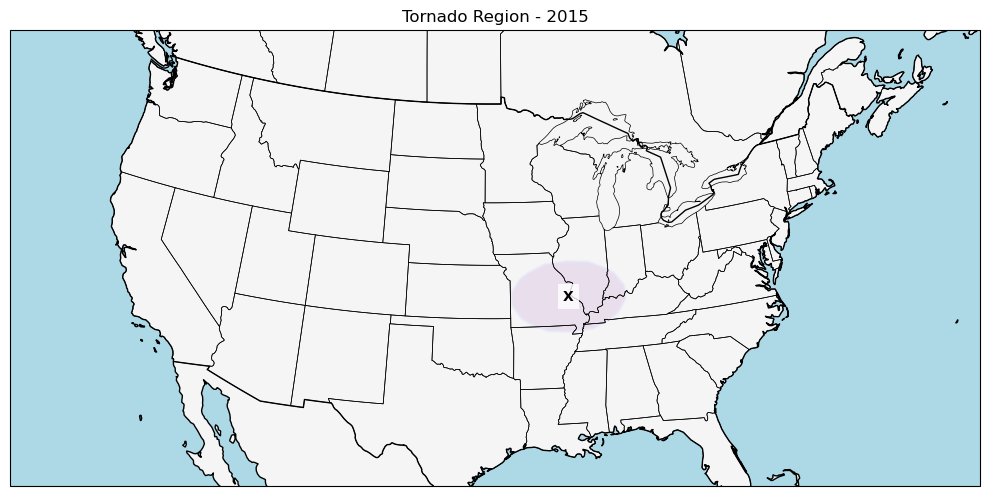

In [6]:

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.patches import Ellipse


year = 2015 # set the year we want to create the map for

# Set up figure and map projection
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.LambertConformal())
ax.set_extent([-125, -66.5, 24, 50], ccrs.Geodetic())  # Mainland USA

# Add geographic features
ax.add_feature(cfeature.STATES, linewidth=0.5)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, facecolor='whitesmoke')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

x = year - 1955 #the dataframe starts at 1955
# Ellipse parameters
center_lat = regress_df_all.iloc[x,1]
center_lon = regress_df_all.iloc[x,3]	
height =  regress_df_all.iloc[x,2]   # degrees latitude
width = regress_df_all.iloc[x,4]	 # degrees longitude
angle = 0     # degrees

# Pastel fill color
pastel_color = '#decbe4'  # light coral (from ColorBrewer pastel palette)

# Create and add ellipse
ellipse = Ellipse((center_lon, center_lat), width, height, angle=angle,
                  edgecolor='lavender', facecolor=pastel_color, alpha=0.5,
                  transform=ccrs.Geodetic(), linewidth=2)

ax.add_patch(ellipse)

# Add label at the center
ax.text(center_lon, center_lat, 'X',
        transform=ccrs.Geodetic(),
        ha='center', va='center', fontsize=10, fontweight='bold',
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.8))

plt.title(f"Tornado Region - {year}")
plt.tight_layout()
plt.show()


predicted begin lat mean  38.17122840684208
predicted begin lon mean  -89.91675246574405
predicted begin lat std  4.034103980977893
predicted begin lon std  7.924256880392036


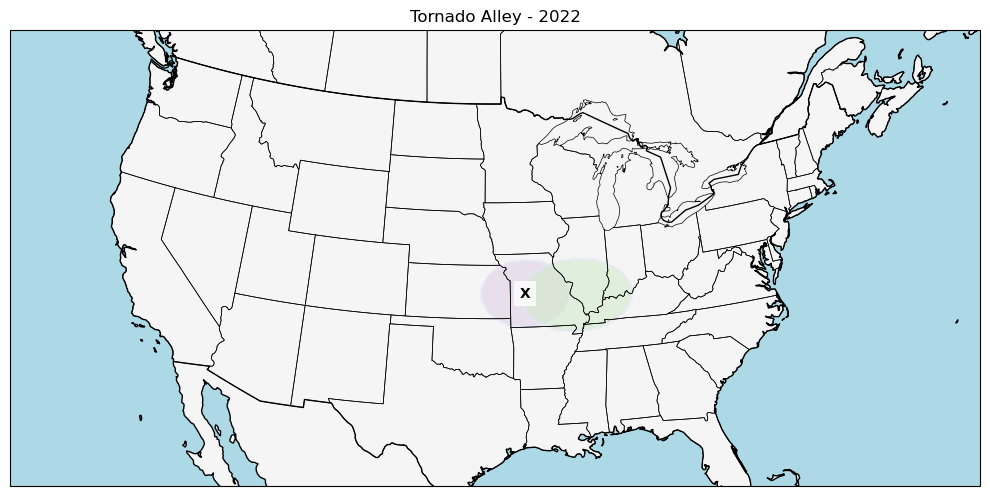

In [9]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import set_style
from sklearn.linear_model import LinearRegression
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.patches import Ellipse

#load dataframe

regress_df = pd.read_csv("regressdf_all.csv")

prediction_year = 2022 #change according to the year which we want the prediction for

#target 1: mean tornado origin latitude

X_systematic = np.linspace(1955, 2016, 100)
x = np.array(regress_df['year'])
y = np.array(regress_df['begin_lat_mean'])

reg = LinearRegression()

reg.fit(x.reshape(-1, 1), y)

y_pred = reg.predict(X_systematic.reshape(-1, 1))

#optional: print the coefficients
#print("Intercept (beta_0):", reg.intercept_)
#print("Coefficient (beta_1):", reg.coef_[0])

b0 = reg.intercept_
b1 = reg.coef_[0]
predicted_lat_mean = b1*prediction_year + b0
print("predicted begin lat mean ",predicted_lat_mean )

#target 2: mean tornado origin longitude

X_systematic = np.linspace(1955, 2016, 100)
x = np.array(regress_df['year'])
y = np.array(regress_df['begin_lon_mean'])

reg = LinearRegression()

reg.fit(x.reshape(-1, 1), y)

y_pred = reg.predict(X_systematic.reshape(-1, 1))

#print("Intercept (beta_0):", reg.intercept_)
#print("Coefficient (beta_1):", reg.coef_[0])

b0 = reg.intercept_
b1 = reg.coef_[0]

predicted_lon_mean = b1*prediction_year + b0
print("predicted begin lon mean ", predicted_lon_mean )


#target 3: standard deviation tornado origin latitude


X_systematic = np.linspace(1955, 2016, 100)
x = np.array(regress_df['year'])
y = np.array(regress_df['begin_lat_std'])

reg = LinearRegression()

reg.fit(x.reshape(-1, 1), y)

y_pred = reg.predict(X_systematic.reshape(-1, 1))

#print("Intercept (beta_0):", reg.intercept_)
#print("Coefficient (beta_1):", reg.coef_[0])

b0 = reg.intercept_
b1 = reg.coef_[0]

predicted_lat_std = b1*prediction_year + b0
print("predicted begin lat std ",predicted_lat_std )


#target 4: standard deviation tornado origin longitude

X_systematic = np.linspace(1955, 2016, 100)
x = np.array(regress_df['year'])
y = np.array(regress_df['begin_lon_std'])

reg = LinearRegression()

reg.fit(x.reshape(-1, 1), y)

y_pred = reg.predict(X_systematic.reshape(-1, 1))

#print("Intercept (beta_0):", reg.intercept_)
#print("Coefficient (beta_1):", reg.coef_[0])

b0 = reg.intercept_
b1 = reg.coef_[0]

predicted_lon_std = b1*prediction_year + b0
print("predicted begin lon std ", predicted_lon_std )

 
# now we want to plot regions -  both actual and predicted by model 


# Set up figure and map projection
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.LambertConformal())
ax.set_extent([-125, -66.5, 24, 50], ccrs.Geodetic())  # Mainland USA

# Add geographic features
ax.add_feature(cfeature.STATES, linewidth=0.5)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, facecolor='whitesmoke')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

x = prediction_year - 1955 #the dataframe starts at 1955

# Ellipse parameters
center_lat = regress_df_all.iloc[1,1]
center_lon = regress_df_all.iloc[1,3]	
height =  regress_df_all.iloc[1,2]   # degrees latitude
width = regress_df_all.iloc[1,4]
angle = 0     # degrees

# Pastel fill color
pastel_color = '#decbe4'  # light coral (from ColorBrewer pastel palette)

# Create and add ellipse
ellipse = Ellipse((center_lon, center_lat), width, height, angle=angle,
                  edgecolor='lavender', facecolor=pastel_color, alpha=0.5,
                  transform=ccrs.Geodetic(), linewidth=2)

ax.add_patch(ellipse)

# Ellipse parameters
center_lon2 =  predicted_lon_mean
center_lat2 = predicted_lat_mean
width2 = predicted_lon_std	 # degrees longitude
height2 =  predicted_lat_std	  # degrees latitude
angle2 = 0     # degrees

# Pastel fill color
pastel_color2 = '#ccebc5'  

# Create and add ellipse
ellipse2 = Ellipse((center_lon2, center_lat2), width2, height2, angle=angle2,
                  edgecolor='lavender', facecolor=pastel_color2, alpha=0.5,
                  transform=ccrs.Geodetic(), linewidth=2)

ax.add_patch(ellipse2)

# Add label at the center
ax.text(center_lon, center_lat, 'X',
        transform=ccrs.Geodetic(),
        ha='center', va='center', fontsize=10, fontweight='bold',
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.8))

plt.title(f"Tornado Alley - {prediction_year}")
plt.tight_layout()
plt.show()

